In [ ]:
!pip install sdv scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.3/152.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.6/51.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.5/170.5 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.6/82.6 kB 5.0 MB/s eta 0:00:00


# MLP on California Housing Data

In [ ]:
# Import necessary libraries for California Housing dataset and MLP Regressor
from sklearn.datasets import fetch_california_housing
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sdv.metadata import SingleTableMetadata
from sdv.single_table import GaussianCopulaSynthesizer

In [ ]:
# Load the California Housing dataset
housing = fetch_california_housing()
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df['MedHouseVal'] = housing.target  # Add target column 'MedHouseVal'
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
# Split the data into features and target
X = housing_df.drop(columns=['MedHouseVal'])
y = housing_df['MedHouseVal']

In [ ]:
# Standardize the data
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
# Split the original data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Train MLP Regressor on Original Data
mlp_original = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=500, random_state=42)
mlp_original.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=500, random_state=42)

In [ ]:
# Predict on the original test data
y_pred_original = mlp_original.predict(X_test)

In [ ]:
# Calculate Evaluation Metrics for Original Data
mae_original = mean_absolute_error(y_test, y_pred_original)
r2_original = r2_score(y_test, y_pred_original)

In [ ]:
# Generate synthetic data using SDV
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=housing_df)
metadata

{
    "columns": {
        "MedInc": {
            "sdtype": "numerical"
        },
        "HouseAge": {
            "sdtype": "numerical"
        },
        "AveRooms": {
            "sdtype": "numerical"
        },
        "AveBedrms": {
            "sdtype": "numerical"
        },
        "Population": {
            "sdtype": "numerical"
        },
        "AveOccup": {
            "sdtype": "numerical"
        },
        "Latitude": {
            "sdtype": "latitude",
            "pii": true
        },
        "Longitude": {
            "sdtype": "longitude",
            "pii": true
        },
        "MedHouseVal": {
            "sdtype": "numerical"
        }
    },
    "METADATA_SPEC_VERSION": "SINGLE_TABLE_V1"
}

In [ ]:
synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(housing_df)

synthetic_data = synthesizer.sample(num_rows=len(housing_df))
synthetic_data.head()

/usr/local/lib/python3.10/dist-packages/sdv/single_table/base.py:120: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/usr/local/lib/python3.10/dist-packages/sdv/single_table/base.py:105: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,5.8111,38.0,6.010547,0.908006,632.0,2.135833,-20.912170,172.450577,2.77646
1,2.9092,46.0,3.919663,1.148985,3061.0,3.217771,-58.623044,-78.762666,2.65995
2,2.2435,34.0,4.052870,1.048037,839.0,2.451532,-49.930883,19.695085,1.76199
3,4.2263,22.0,4.019717,0.773895,3100.0,1.592602,21.918454,-165.665806,2.92502
4,4.4330,7.0,5.741779,1.258423,1168.0,3.998920,-50.714385,178.975433,1.47603


In [ ]:
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
synthetic_data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.878221,31.027180,5.439220,1.100595,1421.171172,3.088154,-0.128211,0.226359,2.045535
std,1.830609,13.544542,1.581731,0.212450,925.665790,1.145955,52.044948,103.851982,1.077956
min,0.499900,2.000000,1.399472,0.518382,3.000000,1.008251,-89.994140,-179.996661,0.198450
25%,2.531000,20.000000,4.298678,0.948922,743.000000,2.250937,-45.328018,-89.583647,1.223685
50%,3.576750,32.000000,5.254400,1.079618,1230.000000,2.882409,-0.319508,-0.040392,1.844015
75%,4.872550,43.000000,6.373383,1.229584,1885.000000,3.710846,44.825567,89.396511,2.667187
max,15.000100,52.000000,14.193943,2.378835,9112.000000,12.067189,89.980761,179.993311,5.000010


In [ ]:
# Split the synthetic data into features and target
X_synthetic = synthetic_data.drop(columns=['MedHouseVal'])
y_synthetic = synthetic_data['MedHouseVal']

In [ ]:
# Standardize the synthetic data
X_synthetic_scaled = pd.DataFrame(scaler.transform(X_synthetic), columns=X_synthetic.columns)

In [ ]:
# Train MLP Regressor on Synthetic Data
mlp_synthetic = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=500, random_state=42)
mlp_synthetic.fit(X_synthetic_scaled, y_synthetic)

MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=500, random_state=42)

In [ ]:
# Predict on the original test data using the model trained on synthetic data
y_pred_synthetic = mlp_synthetic.predict(X_test)

In [ ]:
# Calculate Evaluation Metrics for Synthetic Data
mae_synthetic = mean_absolute_error(y_test, y_pred_synthetic)
r2_synthetic = r2_score(y_test, y_pred_synthetic)

In [ ]:
# Print the results
print("Original Data (MLP):")
print("Mean Absolute Error (MAE): {:.2f}".format(mae_original))

print("R2 Score: {:.2f}".format(r2_original))

print("\nSynthetic Data (MLP):")
print("Mean Absolute Error (MAE): {:.2f}".format(mae_synthetic))

print("R2 Score: {:.2f}".format(r2_synthetic))

Original Data (MLP):
Mean Absolute Error (MAE): 0.34
R2 Score: 0.80

Synthetic Data (MLP):
Mean Absolute Error (MAE): 0.58
R2 Score: 0.53


<ipython-input-23-12c92cd472f4>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=values, palette='viridis')


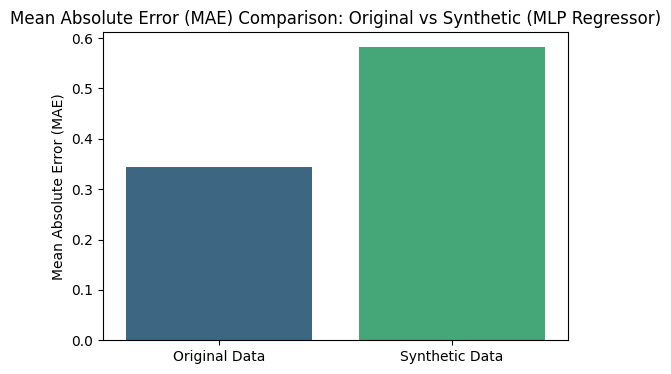

<ipython-input-23-12c92cd472f4>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=values, palette='viridis')


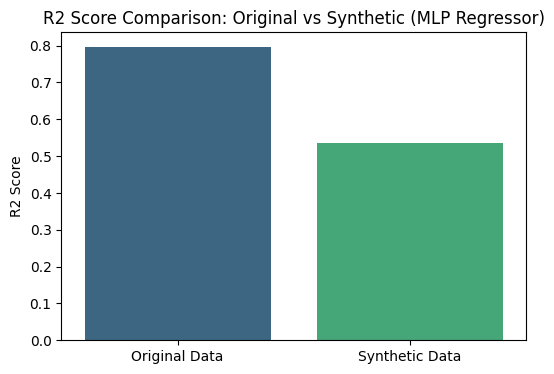

In [ ]:
# Bar plot for MAE, MAPE, and R2 score comparison
metrics = {
    'Mean Absolute Error (MAE)': [mae_original, mae_synthetic],
    'R2 Score': [r2_original, r2_synthetic]
}
labels = ['Original Data', 'Synthetic Data']

for metric, values in metrics.items():
    plt.figure(figsize=(6, 4))
    sns.barplot(x=labels, y=values, palette='viridis')
    plt.title(f'{metric} Comparison: Original vs Synthetic (MLP Regressor)')
    plt.ylabel(metric)
    plt.show()

# Linear regression on California housing data

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Train Linear Regression on Original Data
lin_reg_original = LinearRegression()
lin_reg_original.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict and evaluate on the original test data
y_pred_original = lin_reg_original.predict(X_test)
mse_original = mean_squared_error(y_test, y_pred_original)
r2_original = r2_score(y_test, y_pred_original)

print("Mean Squared Error on Original Data: {:.2f}".format(mse_original))
print("R2 Score on Original Data: {:.2f}".format(r2_original))

Mean Squared Error on Original Data: 0.56
R2 Score on Original Data: 0.58


In [ ]:
# Generate synthetic data using SDV
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=housing_df)
metadata

{
    "METADATA_SPEC_VERSION": "SINGLE_TABLE_V1",
    "columns": {
        "MedInc": {
            "sdtype": "numerical"
        },
        "HouseAge": {
            "sdtype": "numerical"
        },
        "AveRooms": {
            "sdtype": "numerical"
        },
        "AveBedrms": {
            "sdtype": "numerical"
        },
        "Population": {
            "sdtype": "numerical"
        },
        "AveOccup": {
            "sdtype": "numerical"
        },
        "Latitude": {
            "sdtype": "latitude",
            "pii": true
        },
        "Longitude": {
            "sdtype": "longitude",
            "pii": true
        },
        "MedHouseVal": {
            "sdtype": "numerical"
        }
    }
}

In [ ]:
# Initialize SDV synthesizer
synthesizer = GaussianCopulaSynthesizer(metadata)

# Fit the synthesizer on the California Housing dataset
synthesizer.fit(housing_df)

# Generate synthetic data
synthetic_data = synthesizer.sample(num_rows=len(housing_df))
synthetic_data.head()

/usr/local/lib/python3.10/dist-packages/sdv/single_table/base.py:120: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/usr/local/lib/python3.10/dist-packages/sdv/single_table/base.py:105: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,5.8111,38.0,6.010547,0.908006,632.0,2.135833,-20.912170,172.450577,2.77646
1,2.9092,46.0,3.919663,1.148985,3061.0,3.217771,-58.623044,-78.762666,2.65995
2,2.2435,34.0,4.052870,1.048037,839.0,2.451532,-49.930883,19.695085,1.76199
3,4.2263,22.0,4.019717,0.773895,3100.0,1.592602,21.918454,-165.665806,2.92502
4,4.4330,7.0,5.741779,1.258423,1168.0,3.998920,-50.714385,178.975433,1.47603


In [ ]:
# Split synthetic data into features and labels
X_synthetic = synthetic_data.drop(columns=['MedHouseVal'])
y_synthetic = synthetic_data['MedHouseVal']

# Standardize the synthetic data
X_synthetic = pd.DataFrame(scaler.transform(X_synthetic), columns=X_synthetic.columns)

# Train Linear Regression on Synthetic Data
lin_reg_synthetic = LinearRegression()
lin_reg_synthetic.fit(X_synthetic, y_synthetic)

LinearRegression()

In [ ]:
# Predict and evaluate on the original test data using the model trained on synthetic data
y_pred_synthetic = lin_reg_synthetic.predict(X_test)
mse_synthetic = mean_squared_error(y_test, y_pred_synthetic)
r2_synthetic = r2_score(y_test, y_pred_synthetic)

print("\nMean Squared Error on Synthetic Data: {:.2f}".format(mse_synthetic))
print("R2 Score on Synthetic Data: {:.2f}".format(r2_synthetic))


Mean Squared Error on Synthetic Data: 0.66
R2 Score on Synthetic Data: 0.50


<ipython-input-34-79359414e489>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=values, palette='viridis')


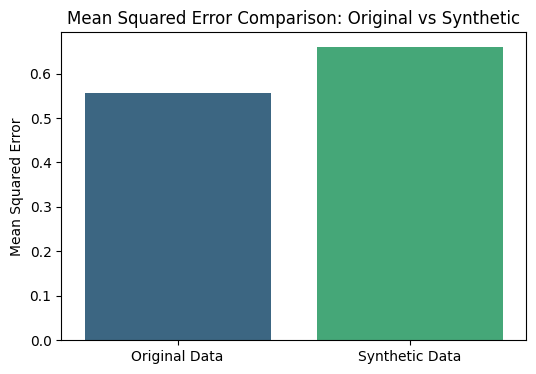

<ipython-input-34-79359414e489>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=values, palette='viridis')


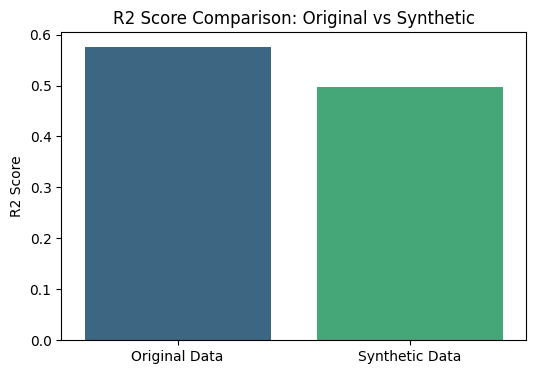

In [ ]:
# Bar plot for MSE and R2 comparison
metrics = {
    'Mean Squared Error': [mse_original, mse_synthetic],
    'R2 Score': [r2_original, r2_synthetic]
}
labels = ['Original Data', 'Synthetic Data']

for metric, values in metrics.items():
    plt.figure(figsize=(6, 4))
    sns.barplot(x=labels, y=values, palette='viridis')
    plt.title(f'{metric} Comparison: Original vs Synthetic')
    plt.ylabel(metric)
    plt.show()

# Data Synthesizer

In [ ]:
!pip install DataSynthesizer

In [ ]:
import DataSynthesizer

In [ ]:
# Train MLP Regressor on Original Data
mlp_original = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=500, random_state=42)
mlp_original.fit(X_train, y_train)

# Predict on the original test data
y_pred_original = mlp_original.predict(X_test)

# Calculate Evaluation Metrics for Original Data
mae_original = mean_absolute_error(y_test, y_pred_original)
r2_original = r2_score(y_test, y_pred_original)

print("Original Data (MLP):")
print("Mean Absolute Error (MAE): {:.2f}".format(mae_original))
print("R2 Score: {:.2f}".format(r2_original))

Original Data (MLP):
Mean Absolute Error (MAE): 0.34
R2 Score: 0.80


In [ ]:
# Initialize the DataSynthesizer
data_synthesizer = DataSynthesizer()

TypeError: 'module' object is not callable

In [ ]:
# Fit the synthesizer on the California Housing dataset
data_synthesizer.fit(housing_df)

# Generate synthetic data with the same number of rows as the original data
synthetic_data = data_synthesizer.sample(num_samples=len(housing_df))

# Split the synthetic data into features and target
X_synthetic = synthetic_data.drop(columns=['MedHouseVal'])
y_synthetic = synthetic_data['MedHouseVal']

# Standardize the synthetic data
X_synthetic_scaled = pd.DataFrame(scaler.transform(X_synthetic), columns=X_synthetic.columns)

# Train MLP Regressor on Synthetic Data
mlp_synthetic = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=500, random_state=42)
mlp_synthetic.fit(X_synthetic_scaled, y_synthetic)

# Predict on the original test data using the model trained on synthetic data
y_pred_synthetic = mlp_synthetic.predict(X_test)

# Calculate Evaluation Metrics for Synthetic Data
mae_synthetic = mean_absolute_error(y_test, y_pred_synthetic)
r2_synthetic = r2_score(y_test, y_pred_synthetic)

print("\nSynthetic Data (MLP):")
print("Mean Absolute Error (MAE): {:.2f}".format(mae_synthetic))
print("R2 Score: {:.2f}".format(r2_synthetic))

# ------------------- Comparison and Visualization -------------------

# Bar plot for MAE and R2 comparison
metrics = {
    'Mean Absolute Error': [mae_original, mae_synthetic],
    'R2 Score': [r2_original, r2_synthetic]
}
labels = ['Original Data', 'Synthetic Data']

for metric, values in metrics.items():
    plt.figure(figsize=(6, 4))
    sns.barplot(x=labels, y=values, hue=None, palette='viridis', legend=False)
    plt.title(f'{metric} Comparison: Original vs Synthetic (MLP Regressor)')
    plt.ylabel(metric)
    plt.show()

TypeError: 'module' object is not callable